In [49]:
import re
import nltk
import pandas as pd
import numpy as np 
import wrangle
import unicodedata
from wrangle import wrangle_articles
import env
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#Wordclouds
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

In [10]:
articles_df = wrangle_articles()

NaN values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------
Empty values
       rows  columns
0       120        1
1       120        6
2       122        1
3       122        6
4       152        1
...     ...      ...
1258  25152        6
1259  25701        1
1260  25701        6
1261  25746        1
1262  25746        6

[1263 rows x 2 columns]
--------------------------------


In [11]:
articles_df.head()

,title,text,subject,date,is_fake,clean_title,clean_text
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,True,flashback king obama commute sentence 22 drug ...,making room hillary president obama today anno...
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,True,apple ceo say religious freedom law dangerous ...,gay mafia new corporate article need read shee...
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,True,watch dirty harry reid lie romneys tax didnt win,case missed sen harry reid rnv announced last ...
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,True,oh guess funded shrine ted kennedy,nothing like political cronyism make stomach c...
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,True,benghazi panel call hillary testify oath white...,anyone really think hillary clinton come clean...


In [12]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt', 'reuters']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [14]:
def show_counts_and_ratios(df, column):
    """
    This fucntion takes in a df and column name.
    Will produce a valuecounts for each label and the percetage of the data it represents
    """
    fof = pd.concat([df.is_fake.value_counts(),
                        df.is_fake.value_counts(normalize=True)], axis=1)
    fof.columns = ['n', 'percent']
    
    return fof

show_counts_and_ratios(articles_df, 'is_fake')

,n,percent
False,20734,0.538965
True,17736,0.461035


In [18]:
df = articles_df
df.head()

,title,text,subject,date,is_fake,clean_title,clean_text
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,True,flashback king obama commute sentence 22 drug ...,making room hillary president obama today anno...
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,True,apple ceo say religious freedom law dangerous ...,gay mafia new corporate article need read shee...
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,True,watch dirty harry reid lie romneys tax didnt win,case missed sen harry reid rnv announced last ...
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,True,oh guess funded shrine ted kennedy,nothing like political cronyism make stomach c...
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,True,benghazi panel call hillary testify oath white...,anyone really think hillary clinton come clean...


In [20]:
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)
df['clean_text'] = df['clean_text'].astype(str)
df['clean_title'] = df['clean_title'].astype(str)

In [21]:
df.head()

,title,text,subject,date,is_fake,clean_title,clean_text
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,True,flashback king obama commute sentence 22 drug ...,making room hillary president obama today anno...
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,True,apple ceo say religious freedom law dangerous ...,gay mafia new corporate article need read shee...
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,True,watch dirty harry reid lie romneys tax didnt win,case missed sen harry reid rnv announced last ...
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,True,oh guess funded shrine ted kennedy,nothing like political cronyism make stomach c...
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,True,benghazi panel call hillary testify oath white...,anyone really think hillary clinton come clean...


In [22]:
fake_words = clean(' '.join(df[df.is_fake == True].clean_text))
real_words = clean(' '.join(df[df.is_fake == False].clean_text))
all_words = clean(' '.join(df.clean_text))

In [23]:
#word frequencies
fake_freq = pd.Series(fake_words).value_counts()
real_freq = pd.Series(real_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

fake_freq.head(10)

trump         62524
said          22715
people        20510
president     19329
one           18031
would         17970
state         15789
donald        14561
like          14289
republican    13903
dtype: int64

In [24]:
#top 10 fake words
fake_words[0:10]

['making',
 'room',
 'hillary',
 'president',
 'obama',
 'today',
 'announced',
 'decision',
 'commute',
 'sentence']

In [25]:
#top 10 real words
real_words[0:10]

['washington',
 'united',
 'state',
 'expand',
 'program',
 'helping',
 'thousand',
 'people',
 'fleeing',
 'violence']

In [26]:
#top 20 of all words
all_words[0:20]

['making',
 'room',
 'hillary',
 'president',
 'obama',
 'today',
 'announced',
 'decision',
 'commute',
 'sentence',
 '22',
 'convicted',
 'drug',
 'offender',
 'many',
 'serving',
 'time',
 'convicted',
 'conspiracy',
 'distribute']

In [31]:
word_counts = (pd.concat([all_freq, fake_freq, real_freq], axis=1, sort=True)
                .set_axis(['all', 'fake', 'real'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts

,all,fake,real
0,48,33,15
00,6,4,2
000,9,8,1
0000,7,3,4
000000017,1,1,0
...,...,...,...
zz,1,1,0
zztaine,1,1,0
zzzzaaaacccchhh,3,3,0
zzzzzzzz,1,1,0


In [32]:
word_counts.sort_values(by='all', ascending=False).head(25)


,all,fake,real
said,118359,22715,95644
trump,115797,62524,53273
state,51026,15789,35237
would,48589,17970,30619
president,45503,19329,26174
republican,35716,13903,21813
people,35279,20510,14769
one,30608,18031,12577
year,28859,10734,18125
also,26584,11170,15414


In [33]:
word_counts.sort_values(by='all', ascending=False).tail(25)

,all,fake,real
himsean,1,1,0
himsecondly,1,1,0
himsee,1,1,0
himselfabc,1,1,0
himrobert,1,1,0
himrepublican,1,1,0
himoutside,1,1,0
himpolitical,1,1,0
himover,1,1,0
himpalm,1,1,0


In [36]:
# ratio 
word_counts_ratio  = (word_counts
 [(word_counts.fake > 10) & (word_counts.real > 10)]
 .assign(ratio=lambda df: df.fake / (df.real + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))
word_counts_ratio

,all,fake,real,ratio
thats,1161,17,1144,0.014860
im,1223,18,1205,0.014938
lebanese,645,11,634,0.017350
dont,2038,38,2000,0.019000
parliamentary,776,15,761,0.019711
rant,464,451,13,34.665642
damn,433,422,11,38.328792
gop,3738,3649,89,40.995394
hannity,934,918,16,57.339163
cop,955,939,16,58.650843


Text(0.5, 1.0, 'Proportion of Fake News and Real News for the 20 most common words')

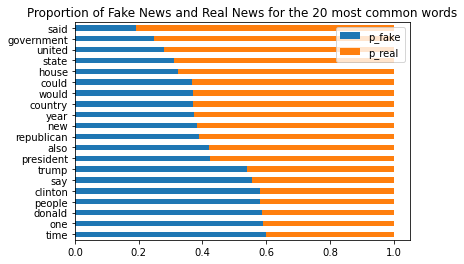

In [38]:
#Barplot
(word_counts
 .assign(p_fake=word_counts.fake / word_counts['all'],
         p_real=word_counts.real / word_counts['all'])
 .sort_values(by='all')
 [['p_fake', 'p_real']]
 .tail(20)
 .sort_values('p_real')
 .plot.barh(stacked=True))

plt.title('Proportion of Fake News and Real News for the 20 most common words')

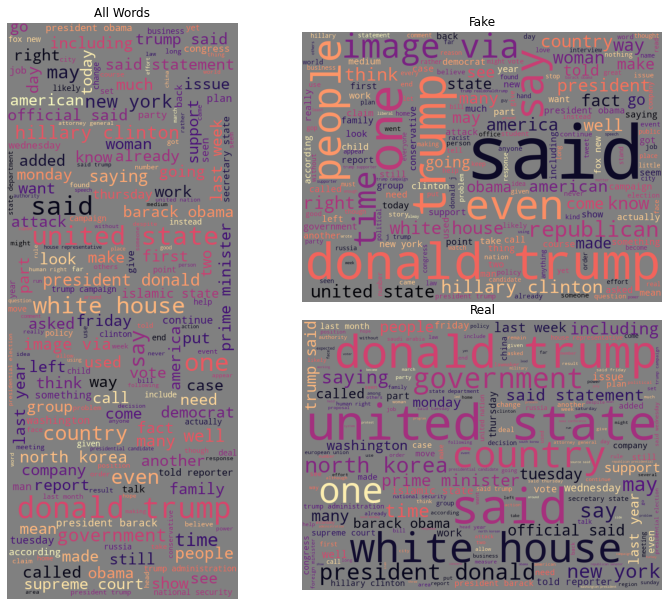

In [47]:
#wordclouds
all_cloud = WordCloud(background_color='grey', height=1000, width=400, colormap="magma").generate(' '.join(all_words))
fake_cloud = WordCloud(background_color='grey', height=600, width=800, colormap="magma").generate(' '.join(fake_words))
real_cloud = WordCloud(background_color='grey', height=600, width=800, colormap="magma").generate(' '.join(real_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(fake_cloud)
axs[2].imshow(real_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Fake')
axs[2].set_title('Real')

for ax in axs: ax.axis('off')

In [40]:
top_20_real_bigrams = (pd.Series(nltk.ngrams(real_words, 2))
                      .value_counts()
                      .head(20))

top_20_real_bigrams.head()

(united, state)        11823
(donald, trump)         9941
(white, house)          8221
(president, donald)     5765
(north, korea)          5354
dtype: int64

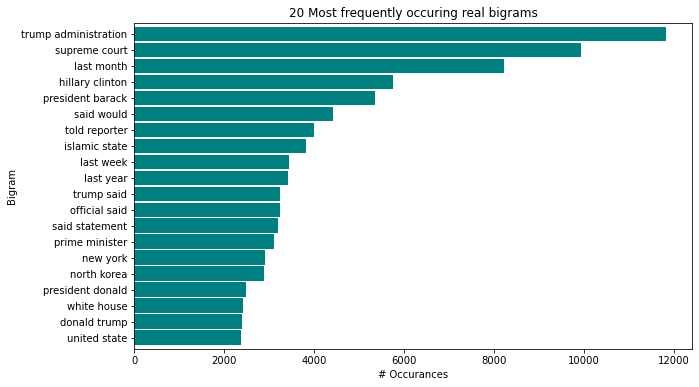

In [44]:
top_20_real_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring real bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_real_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [45]:
top_20_fake_bigrams = (pd.Series(nltk.ngrams(fake_words, 2))
                      .value_counts()
                      .head(20))

top_20_fake_bigrams.head()

(donald, trump)       11132
(image, via)           6081
(hillary, clinton)     4983
(white, house)         4700
(united, state)        4563
dtype: int64

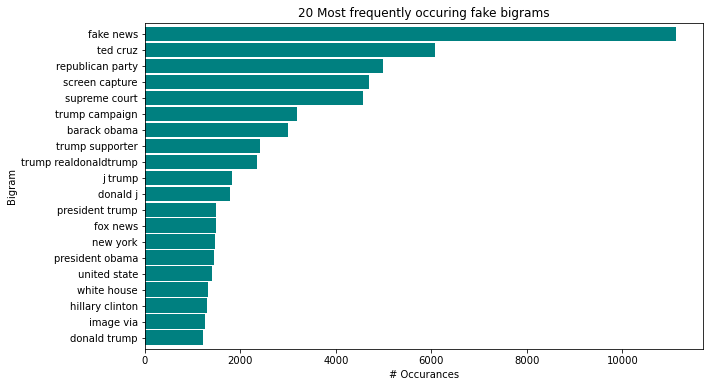

In [46]:
top_20_fake_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [53]:
#Trumpmask cloud wordcloud


TypeError: expected string or bytes-like object